## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [3]:
# Load the dataset
file_path = "../../sampledata/visaproblem/EasyVisa.csv"
data_orig = pd.read_csv(file_path)

data = data_orig.copy()

# Display the first few rows of the dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [4]:
# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
data.head()



First 5 rows of the dataset:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# Display the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
data.tail()


Last 5 rows of the dataset:


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [6]:
# Display the shape of the dataset
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 25480 rows and 12 columns.


#### Check the data types of the columns for the dataset

In [7]:
# Display the data types of the columns
print("Data types of the columns:")
data.dtypes

Data types of the columns:


case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [8]:
# Display the statistical summary of the dataset
data.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


#### Fixing the negative values in number of employees columns

In [9]:
# Replace negative values in the 'no_of_employees' column with their absolute values
data['no_of_employees'] = data['no_of_employees'].abs()

# Verify that there are no negative values
print("Negative values in 'no_of_employees':", (data['no_of_employees'] < 0).sum())

Negative values in 'no_of_employees': 0


#### Let's check the count of each unique category in each of the categorical variables

In [10]:
# Count the unique values for each categorical column
for column in data.select_dtypes(include=['object']).columns:
    print(f"Unique value counts for {column}:")
    display(data[column].value_counts().to_frame(name='Count'))


Unique value counts for case_id:


,Count
case_id,
EZYV01,1
EZYV16995,1
EZYV16993,1
EZYV16992,1
EZYV16991,1
...,...
EZYV8492,1
EZYV8491,1
EZYV8490,1


Unique value counts for continent:


,Count
continent,
Asia,16861
Europe,3732
North America,3292
South America,852
Africa,551
Oceania,192


Unique value counts for education_of_employee:


,Count
education_of_employee,
Bachelor's,10234
Master's,9634
High School,3420
Doctorate,2192


Unique value counts for has_job_experience:


,Count
has_job_experience,
Y,14802
N,10678


Unique value counts for requires_job_training:


,Count
requires_job_training,
N,22525
Y,2955


Unique value counts for region_of_employment:


,Count
region_of_employment,
Northeast,7195
South,7017
West,6586
Midwest,4307
Island,375


Unique value counts for unit_of_wage:


,Count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


Unique value counts for full_time_position:


,Count
full_time_position,
Y,22773
N,2707


Unique value counts for case_status:


,Count
case_status,
Certified,17018
Denied,8462


### Univariate Analysis

In [11]:
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (10,6))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    display(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(8, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(8, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

Distribution of education levels:


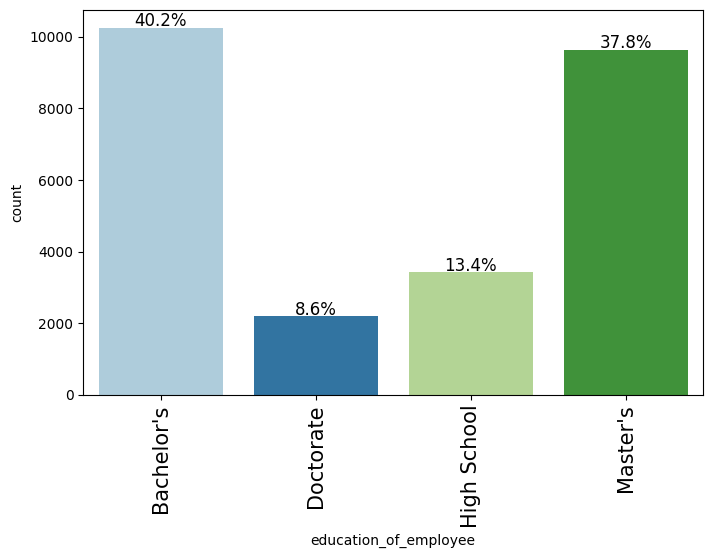

In [12]:
# Analyze the distribution of education levels
print("Distribution of education levels:")
labeled_barplot(data, 'education_of_employee', perc=True)


#### Observations on region of employment

Distribution of regions of employment:


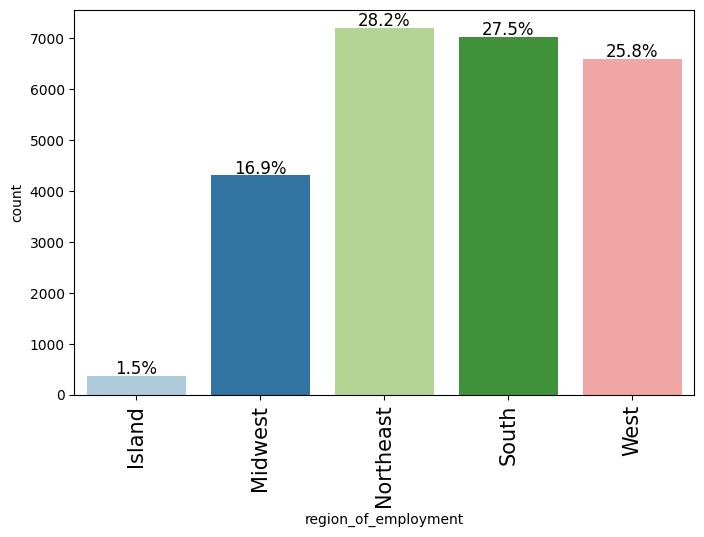

In [13]:
# Analyze the distribution of regions of employment
print("Distribution of regions of employment:")
#print(data['region_of_employment'].value_counts())

# Plot the distribution of regions of employment
labeled_barplot(data, 'region_of_employment', perc=True)


#### Observations on job experience

Distribution of job experience:


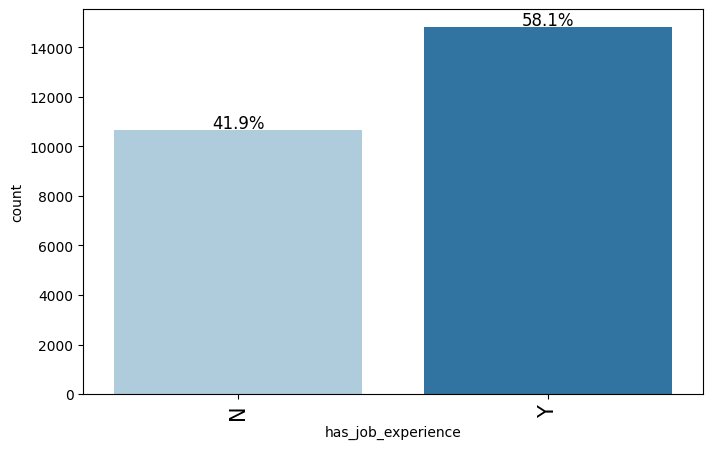

In [14]:
# Analyze the distribution of job experience
print("Distribution of job experience:")
labeled_barplot(data, 'has_job_experience', perc=True)



#### Observations on case status

Distribution of case status:


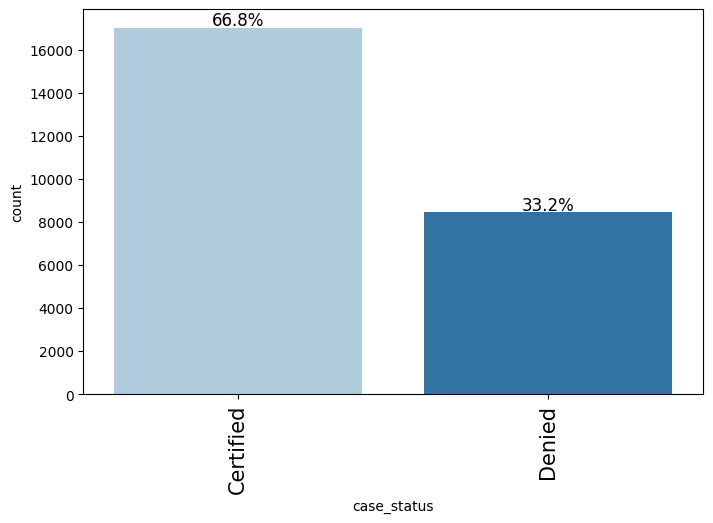

In [15]:
# Analyze the distribution of case status
print("Distribution of case status:")
labeled_barplot(data, 'case_status', perc=True)

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [16]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification


Relationship between education level and visa case status:


case_status,Certified,Denied,All
education_of_employee,,,
All,17018,8462,25480
Bachelor's,6367,3867,10234
High School,1164,2256,3420
Master's,7575,2059,9634
Doctorate,1912,280,2192


------------------------------------------------------------------------------------------------------------------------


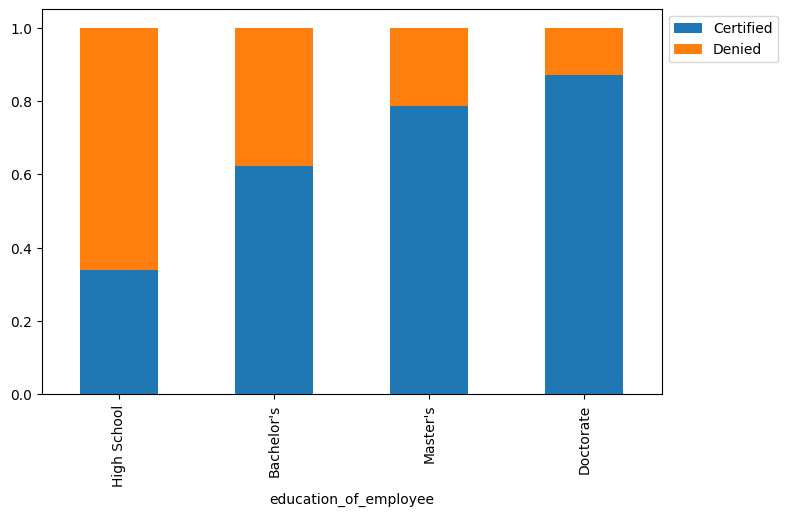

In [17]:
# Analyze the relationship between education level and visa case status
print("\nRelationship between education level and visa case status:")
stacked_barplot(data, 'education_of_employee', 'case_status')

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.


Relationship between regions of employment and visa case status:


case_status,Certified,Denied,All
region_of_employment,,,
All,17018,8462,25480
Northeast,4526,2669,7195
West,4100,2486,6586
South,4913,2104,7017
Midwest,3253,1054,4307
Island,226,149,375


------------------------------------------------------------------------------------------------------------------------


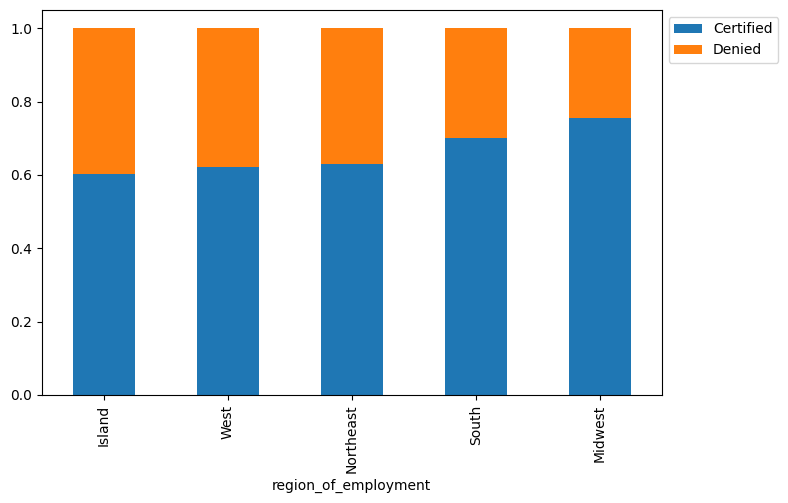

In [18]:

# Analyze the relationship between regions of employment and visa case status
print("\nRelationship between regions of employment and visa case status:")
stacked_barplot(data, 'region_of_employment', 'case_status')


#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification


Relationship between job experience and visa case status:


case_status,Certified,Denied,All
has_job_experience,,,
All,17018,8462,25480
N,5994,4684,10678
Y,11024,3778,14802


------------------------------------------------------------------------------------------------------------------------


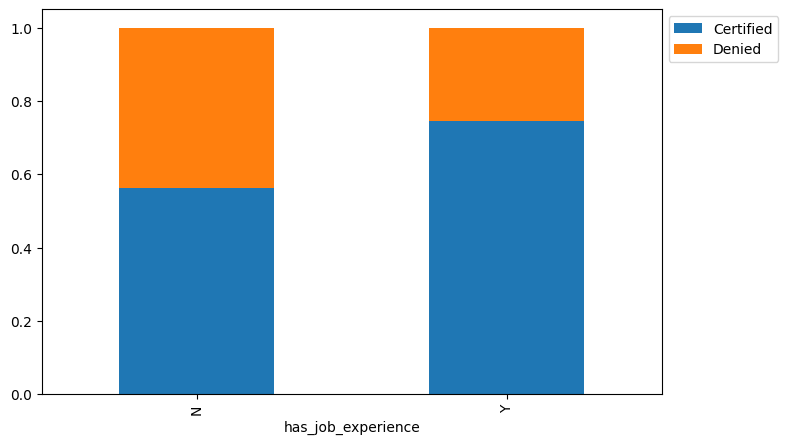

In [19]:

# Analyze the relationship between job experience and visa case status
print("\nRelationship between job experience and visa case status:")
stacked_barplot(data, 'has_job_experience', 'case_status')


#### Checking if the prevailing wage is similar across all the regions of the US

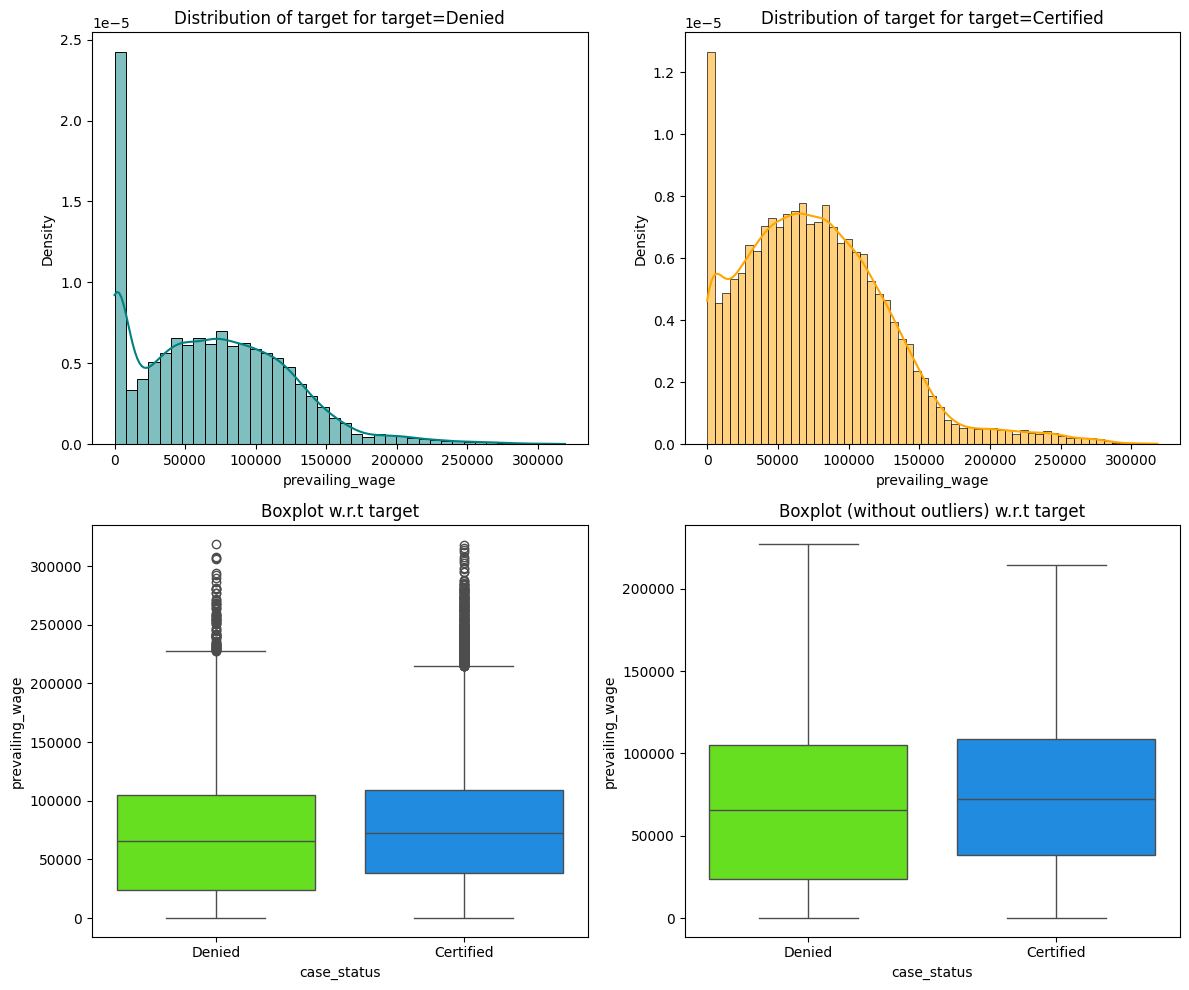

In [20]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.


Relationship between unit of wage and visa case status:


case_status,Certified,Denied,All
unit_of_wage,,,
All,17018,8462,25480
Year,16047,6915,22962
Hour,747,1410,2157
Week,169,103,272
Month,55,34,89


------------------------------------------------------------------------------------------------------------------------


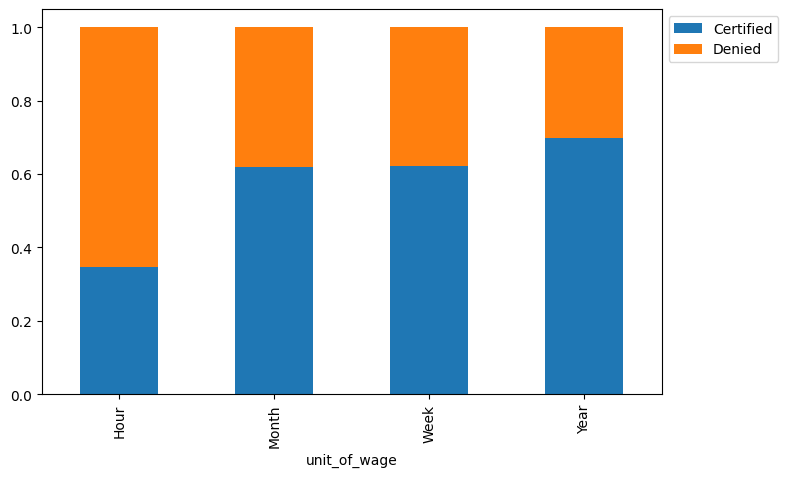

In [21]:
# Analyze the relationship between unit of wage and visa case status
print("\nRelationship between unit of wage and visa case status:")
stacked_barplot(data, 'unit_of_wage', 'case_status')

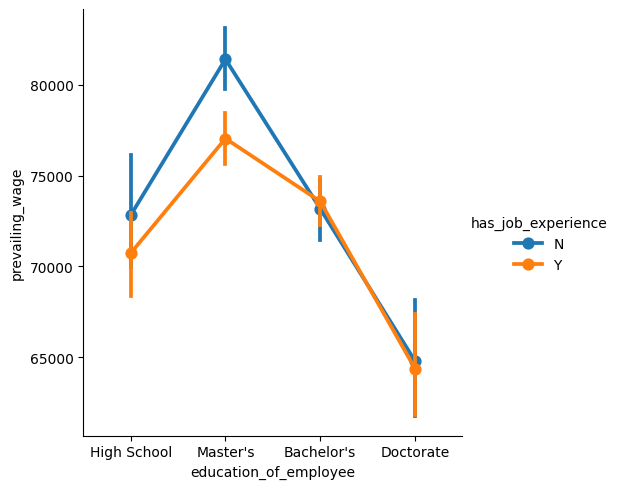

In [22]:
#Compare the distributions of prevailing wage for different education levels and job experience
sns.catplot(data=data, x='education_of_employee', y='prevailing_wage', hue='has_job_experience', kind='point');

## Data Pre-processing

Outliers in no_of_employees:
       no_of_employees
0                14513
2                44444
12              123876
14               15756
16               76638
...                ...
25441            28199
25443            72892
25455            24335
25464            48785
25471            40224

[1556 rows x 1 columns]
Number of outliers in no_of_employees: 1556
--------------------------------------------------
Outliers in yr_of_estab:
       yr_of_estab
3             1897
7             1924
23            1884
31            1880
38            1909
...            ...
25445         1890
25463         1838
25467         1882
25477         1910
25478         1887

[3260 rows x 1 columns]
Number of outliers in yr_of_estab: 3260
--------------------------------------------------
Outliers in prevailing_wage:
       prevailing_wage
14           220081.73
34           225569.73
130          247393.01
216          269321.68
221          219529.62
...                ...
25191        280

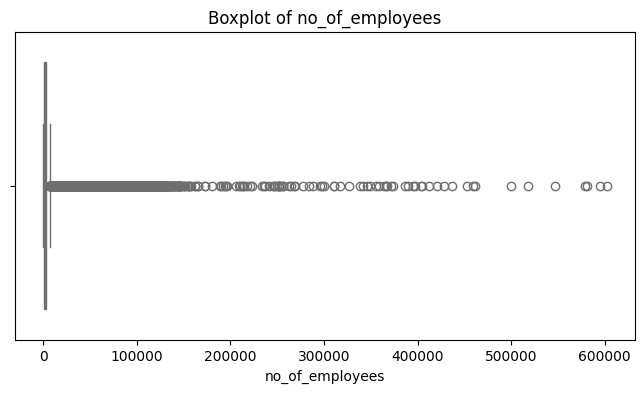

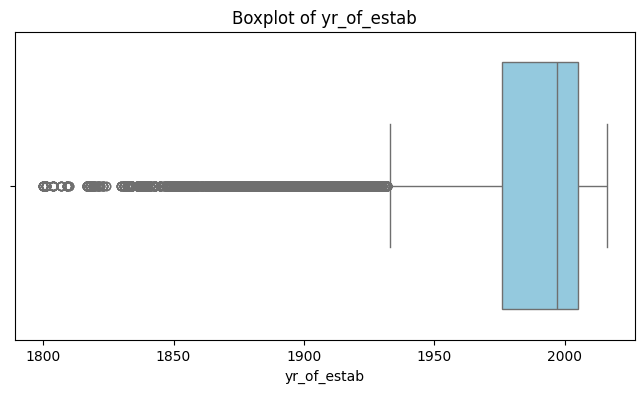

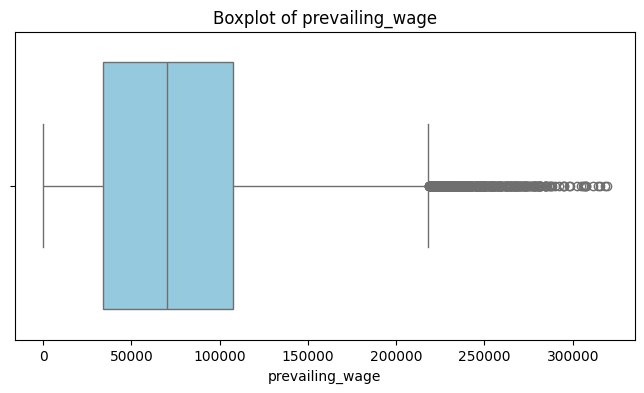

In [23]:
# Define numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Function to detect outliers using the IQR method
def detect_outliers_iqr(data, column):
    """
    Detect outliers in a column using the IQR method.

    data: DataFrame
    column: Column name to check for outliers
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Check for outliers in numerical columns
for col in numerical_columns:
    print(f"Outliers in {col}:")
    outliers = detect_outliers_iqr(data, col)
    print(outliers[[col]])
    print(f"Number of outliers in {col}: {len(outliers)}")
    print("-" * 50)

# Visualize outliers using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col, color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.show()

### Data Preparation for modeling

In [24]:
# Drop non-predictive columns like 'case_id'
X = data.drop(columns=['case_id', 'case_status'])
# 
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)  
# # One-hot encoding for categorical variables
# # Ensure target variable is numeric
y = data['case_status'].map({'Certified': 1, 'Denied': 0})
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Further split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
# Display the shapes of the datasets



# Create a dictionary to store the information
data_info = {
    "Dataset": ["Training", "Validation", "Test"],
    "Shape (X, y)": [f"{X_train.shape}, {y_train.shape}", f"{X_val.shape}, {y_val.shape}", f"{X_test.shape}, {y_test.shape}"],
    "Class 0 (%)": [
        f"{y_train.value_counts(normalize=True)[0] * 100:.2f}%" if 0 in y_train.value_counts() else "0%",
        f"{y_val.value_counts(normalize=True)[0] * 100:.2f}%" if 0 in y_val.value_counts() else "0%",
        f"{y_test.value_counts(normalize=True)[0] * 100:.2f}%" if 0 in y_test.value_counts() else "0%"
    ],
    "Class 1 (%)": [
        f"{y_train.value_counts(normalize=True)[1] * 100:.2f}%" if 1 in y_train.value_counts() else "0%",
        f"{y_val.value_counts(normalize=True)[1] * 100:.2f}%" if 1 in y_val.value_counts() else "0%",
        f"{y_test.value_counts(normalize=True)[1] * 100:.2f}%" if 1 in y_test.value_counts() else "0%"
    ]
}

# Convert the dictionary into a DataFrame
info_df = pd.DataFrame(data_info)

# Display the DataFrame
display(info_df)

,Dataset,"Shape (X, y)",Class 0 (%),Class 1 (%)
0,Training,"(14268, 21), (14268,)",33.21%,66.79%
1,Validation,"(3568, 21), (3568,)",33.21%,66.79%
2,Test,"(7644, 21), (7644,)",33.22%,66.78%


In [52]:
X_train

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
23261,3560,1997,92985.97,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
16907,1294,1988,30784.19,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True
23571,4718,2006,66764.29,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,True,True
21571,784,1966,187499.99,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True
11820,2125,2016,65493.35,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21727,4553,2008,60759.25,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False
22405,1096,2001,80487.63,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True
21069,5043,2009,97476.21,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True
14308,2262,1859,88467.88,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True


In [51]:
# Display the data types of the columns in X_train
print(X_train.dtypes)

no_of_employees                        int64
yr_of_estab                            int64
prevailing_wage                      float64
continent_Asia                          bool
continent_Europe                        bool
continent_North America                 bool
continent_Oceania                       bool
continent_South America                 bool
education_of_employee_Doctorate         bool
education_of_employee_High School       bool
education_of_employee_Master's          bool
has_job_experience_Y                    bool
requires_job_training_Y                 bool
region_of_employment_Midwest            bool
region_of_employment_Northeast          bool
region_of_employment_South              bool
region_of_employment_West               bool
unit_of_wage_Month                      bool
unit_of_wage_Week                       bool
unit_of_wage_Year                       bool
full_time_position_Y                    bool
dtype: object


## Model Building

### Model Evaluation Criterion

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [58]:
def confusion_matrix_sklearn (model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
from sklearn.metrics import make_scorer, f1_score

# Define F1 scorer for classification tasks
f1_scorer = make_scorer(f1_score, greater_is_better=True)

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [59]:
# Ensure classifiers is defined
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


if 'classifiers' not in locals():
    classifiers = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'AdaBoost': AdaBoostClassifier(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(random_state=42),
        'Naive Bayes': GaussianNB(),
        'XGBoost': XGBClassifier(random_state=42)
    }

# Perform K-fold cross-validation and compare classifiers
kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

Evaluating Random Forest...
Evaluating Decision Tree...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating K-Nearest Neighbors...
Evaluating Support Vector Machine...
Evaluating Naive Bayes...
Evaluating XGBoost...


,Classifier,Mean F1 Score,Std Dev
0,Random Forest,0.799874,0.003237
1,Decision Tree,0.740858,0.010154
2,Gradient Boosting,0.823598,0.005871
3,AdaBoost,0.820192,0.007060
4,K-Nearest Neighbors,0.749108,0.005866
5,Support Vector Machine,0.800840,0.000106
6,Naive Bayes,0.801043,0.000444
7,XGBoost,0.806484,0.005840


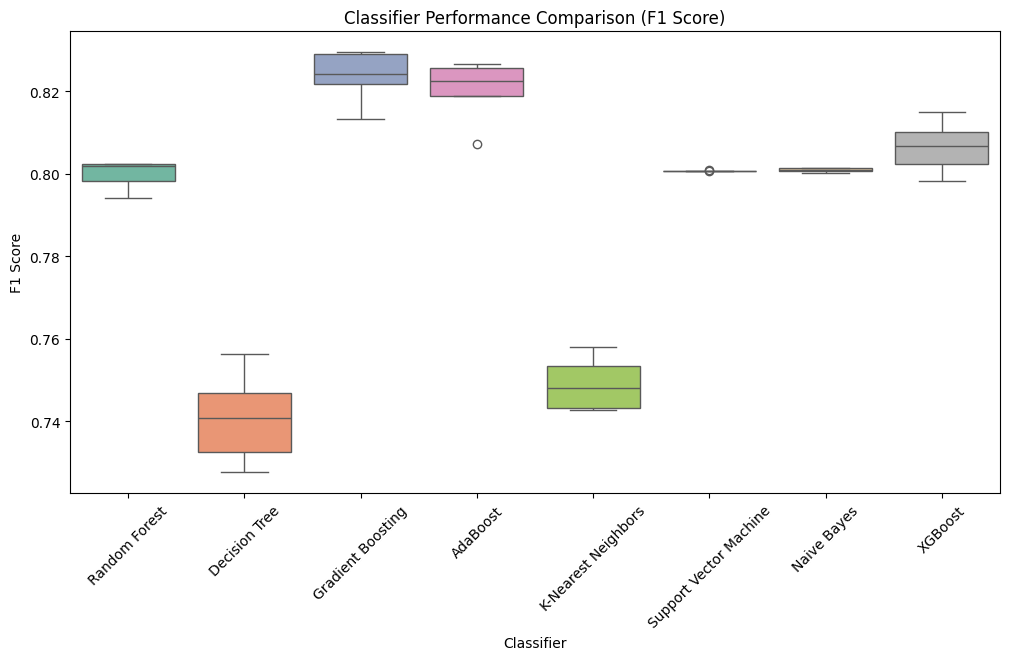

,Classifier,F1 Score
2,Gradient Boosting,0.821344
3,AdaBoost,0.818394
7,XGBoost,0.811197
6,Naive Bayes,0.801076
5,Support Vector Machine,0.800672
0,Random Forest,0.798554
4,K-Nearest Neighbors,0.745606
1,Decision Tree,0.740913


In [29]:


# Dictionary to store cross-validation results
cv_results = {}

# Iterate through classifiers
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=f1_scorer)
    cv_results[name] = scores
    # Store results in a DataFrame
    if 'cv_summary' not in locals():
        cv_summary = pd.DataFrame(columns=['Classifier', 'Mean F1 Score', 'Std Dev'])

    cv_summary = pd.concat([cv_summary, pd.DataFrame({
        'Classifier': [name],
        'Mean F1 Score': [scores.mean()],
        'Std Dev': [scores.std()]
    })], ignore_index=True)

# Display the summary DataFrame
display(cv_summary)

# Compare classifier performance
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.melt(var_name="Classifier", value_name="F1 Score")

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.boxplot(x="Classifier", y="F1 Score", data=cv_results_df, palette="Set2")
plt.title("Classifier Performance Comparison (F1 Score)")
plt.xticks(rotation=45)
plt.show()

# Initialize a DataFrame to store validation performance
validation_performance = pd.DataFrame(columns=["Classifier", "F1 Score"])

# Evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)  # Fit the model on X_train and y_train
    score = f1_scorer(model, X_val, y_val)  # Evaluate the model using the scorer function
    validation_performance = pd.concat(
        [validation_performance, pd.DataFrame({"Classifier": [name], "F1 Score": [score]})],
        ignore_index=True
    )


# Sort the DataFrame by F1 Score in descending order and display it
display(validation_performance.sort_values(by="F1 Score", ascending=False))


In [60]:
# Initialize a DataFrame to store validation performance
validation_performance = pd.DataFrame(columns=["Classifier", "F1 Score", "Precision", "Recall"])

# Evaluate each classifier
for name, model in classifiers.items():
    model.fit(X_train, y_train)  # Fit the model on X_train and y_train
    y_pred = model.predict(X_val)  # Predict on validation set
    f1 = f1_score(y_val, y_pred)  # Calculate F1 score
    precision = precision_score(y_val, y_pred)  # Calculate precision
    recall = recall_score(y_val, y_pred)  # Calculate recall
    validation_performance = pd.concat(
        [validation_performance, pd.DataFrame({"Classifier": [name], "F1 Score": [f1], "Precision": [precision], "Recall": [recall]})],
        ignore_index=True
    )

# Sort the DataFrame by F1 Score in descending order and display it
display(validation_performance.sort_values(by="F1 Score", ascending=False))


,Classifier,F1 Score,Precision,Recall
2,Gradient Boosting,0.821344,0.776242,0.872010
3,AdaBoost,0.818394,0.763914,0.881242
7,XGBoost,0.811197,0.769781,0.857323
6,Naive Bayes,0.801076,0.668350,0.999580
5,Support Vector Machine,0.800672,0.667788,0.999580
0,Random Forest,0.798554,0.765794,0.834243
4,K-Nearest Neighbors,0.745606,0.690766,0.809903
1,Decision Tree,0.740913,0.746275,0.735627


### Model Building with oversampled data

In [31]:
# Calculate class distribution before SMOTE
class_distribution_before = y_train.value_counts().rename_axis('Class').reset_index(name='Count Before SMOTE')

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calculate class distribution after SMOTE
class_distribution_after = y_train_smote.value_counts().rename_axis('Class').reset_index(name='Count After SMOTE')

# Combine and display class distributions
class_distribution = pd.merge(class_distribution_before, class_distribution_after, on='Class')
display(class_distribution)


,Class,Count Before SMOTE,Count After SMOTE
0,1,9530,9530
1,0,4738,9530


In [32]:
# Initialize a DataFrame to store oversampled validation performance with Precision and Recall
oversampled_performance = pd.DataFrame(columns=["Classifier", "F1 Score", "Precision", "Recall"])

# Train classifiers on the oversampled data
for name, model in classifiers.items():
    print(f"Training {name} on oversampled data...")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_val)  # Predict on validation set
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    oversampled_performance = pd.concat(
        [oversampled_performance, pd.DataFrame({"Classifier": [name], "F1 Score": [f1], "Precision": [precision], "Recall": [recall]})],
        ignore_index=True
    )

# Combine validation and oversampled performance side-by-side
validation_over_combined_performance = pd.merge(
    validation_performance.rename(columns={"F1 Score": "Validation F1 Score"}),
    oversampled_performance.rename(columns={"F1 Score": "Oversampled F1 Score", "Precision": "Oversampled Precision", "Recall": "Oversampled Recall"}),
    on="Classifier"
)

# Display the combined performance
display(validation_over_combined_performance)


Training Random Forest on oversampled data...
Training Decision Tree on oversampled data...
Training Gradient Boosting on oversampled data...
Training AdaBoost on oversampled data...
Training K-Nearest Neighbors on oversampled data...
Training Support Vector Machine on oversampled data...
Training Naive Bayes on oversampled data...
Training XGBoost on oversampled data...


,Classifier,Validation F1 Score,Precision,Recall,Oversampled F1 Score,Oversampled Precision,Oversampled Recall
0,Random Forest,0.798554,0.765794,0.834243,0.794312,0.780478,0.808645
1,Decision Tree,0.740913,0.746275,0.735627,0.725444,0.740175,0.711288
2,Gradient Boosting,0.821344,0.776242,0.872010,0.816637,0.779985,0.856903
3,AdaBoost,0.818394,0.763914,0.881242,0.812150,0.775277,0.852707
4,K-Nearest Neighbors,0.745606,0.690766,0.809903,0.639982,0.698610,0.590432
5,Support Vector Machine,0.800672,0.667788,0.999580,0.785518,0.696047,0.901385
6,Naive Bayes,0.801076,0.668350,0.999580,0.305686,0.752883,0.191775
7,XGBoost,0.811197,0.769781,0.857323,0.809868,0.775643,0.847251


### Model Building with undersampled data

In [33]:
# Calculate class distribution before undersampling
class_distribution_before = y_train.value_counts().rename_axis('Class').reset_index(name='Count Before Undersampling')

# Apply RandomUnderSampler to undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Calculate class distribution after undersampling
class_distribution_after = y_train_rus.value_counts().rename_axis('Class').reset_index(name='Count After Undersampling')

# Combine and display class distributions
class_distribution = pd.merge(class_distribution_before, class_distribution_after, on='Class')
display(class_distribution)


,Class,Count Before Undersampling,Count After Undersampling
0,1,9530,4738
1,0,4738,4738


In [34]:
# Initialize a DataFrame to store undersampled validation performance
undersampled_performance = pd.DataFrame(columns=["Classifier", "F1 Score", "Precision", "Recall"])

# Train classifiers on the undersampled data
for name, model in classifiers.items():
    print(f"Training {name} on undersampled data...")
    model.fit(X_train_rus, y_train_rus)
    y_pred = model.predict(X_val)  # Predict on validation set
    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    undersampled_performance = pd.concat(
        [undersampled_performance, pd.DataFrame({"Classifier": [name], "F1 Score": [f1], "Precision": [precision], "Recall": [recall]})],
        ignore_index=True
    )

# Combine validation, oversampled, and undersampled performance side-by-side
combined_performance = pd.merge(
    validation_over_combined_performance,
    undersampled_performance.rename(columns={"F1 Score": "Undersampled F1 Score", "Precision": "Undersampled Precision", "Recall": "Undersampled Recall"}),
    on="Classifier"
)

# Display the combined performance
display(combined_performance)

Training Random Forest on undersampled data...
Training Decision Tree on undersampled data...
Training Gradient Boosting on undersampled data...
Training AdaBoost on undersampled data...
Training K-Nearest Neighbors on undersampled data...
Training Support Vector Machine on undersampled data...
Training Naive Bayes on undersampled data...
Training XGBoost on undersampled data...


,Classifier,Validation F1 Score,Precision,Recall,Oversampled F1 Score,Oversampled Precision,Oversampled Recall,Undersampled F1 Score,Undersampled Precision,Undersampled Recall
0,Random Forest,0.798554,0.765794,0.834243,0.794312,0.780478,0.808645,0.741743,0.817906,0.678556
1,Decision Tree,0.740913,0.746275,0.735627,0.725444,0.740175,0.711288,0.687428,0.763320,0.625262
2,Gradient Boosting,0.821344,0.776242,0.872010,0.816637,0.779985,0.856903,0.773648,0.823697,0.729333
3,AdaBoost,0.818394,0.763914,0.881242,0.812150,0.775277,0.852707,0.769602,0.807373,0.735208
4,K-Nearest Neighbors,0.745606,0.690766,0.809903,0.639982,0.698610,0.590432,0.599809,0.693664,0.528326
5,Support Vector Machine,0.800672,0.667788,0.999580,0.785518,0.696047,0.901385,0.782065,0.695652,0.892992
6,Naive Bayes,0.801076,0.668350,0.999580,0.305686,0.752883,0.191775,0.248845,0.813953,0.146874
7,XGBoost,0.811197,0.769781,0.857323,0.809868,0.775643,0.847251,0.753369,0.810536,0.703735


In [46]:
# Add a column to indicate the better dataset for each model
combined_performance['Better Dataset'] = combined_performance.apply(
    lambda row: 'Oversampled' if row['Oversampled F1 Score'] > row['Undersampled F1 Score'] else 'Undersampled',
    axis=1
)

# Add a column to indicate whether the model is eliminated based on a threshold
threshold = 0.75  # Define a threshold for F1 Score
combined_performance['Eliminated'] = combined_performance.apply(
    lambda row: row['Oversampled F1 Score'] < threshold if row['Better Dataset'] == 'Oversampled' else row['Undersampled F1 Score'] < threshold,
    axis=1
)

# Display the updated DataFrame sorted by the 'Eliminated' column
display(combined_performance[['Classifier', 'Oversampled F1 Score', 'Undersampled F1 Score', 'Better Dataset', 'Eliminated']].sort_values(by='Eliminated'))


,Classifier,Oversampled F1 Score,Undersampled F1 Score,Better Dataset,Eliminated
0,Random Forest,0.794312,0.741743,Oversampled,False
2,Gradient Boosting,0.816637,0.773648,Oversampled,False
3,AdaBoost,0.812150,0.769602,Oversampled,False
5,Support Vector Machine,0.785518,0.782065,Oversampled,False
7,XGBoost,0.809868,0.753369,Oversampled,False
1,Decision Tree,0.725444,0.687428,Oversampled,True
4,K-Nearest Neighbors,0.639982,0.599809,Oversampled,True
6,Naive Bayes,0.305686,0.248845,Oversampled,True


## Hyperparameter Tuning

In [55]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each classifier
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Support Vector Machine': { }, # Takes Too long to tune
    'Naive Bayes': {},  # No hyperparameters to tune for GaussianNB
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

# Initialize a DataFrame to store the results
tuning_results = pd.DataFrame(columns=["Classifier", "Best Params", "Best F1 Score"])
# Perform GridSearchCV for each classifier using oversampled SMOTE data
for name, model in classifiers.items():
    print(f"Tuning hyperparameters for {name} using SMOTE data...")
    if name in param_grids and param_grids[name]:  # Check if there are parameters to tune
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring=f1_scorer,
            cv=kfold,
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train_smote, y_train_smote)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
    else:  # For models without hyperparameters to tune
        model.fit(X_train_smote, y_train_smote)
        best_params = "Default"
        best_score = f1_scorer(model, X_val, y_val)

    # Append the results to the DataFrame
    tuning_results = pd.concat(
        [tuning_results, pd.DataFrame({"Classifier": [name], "Best Params": [best_params], "Best F1 Score": [best_score]})],
        ignore_index=True
    )

# Sort the results by Best F1 Score in descending order
tuning_results = tuning_results.sort_values(by="Best F1 Score", ascending=False)

# Display the results
display(tuning_results)

Tuning hyperparameters for Random Forest using SMOTE data...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuning hyperparameters for Decision Tree using SMOTE data...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning hyperparameters for Gradient Boosting using SMOTE data...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Tuning hyperparameters for AdaBoost using SMOTE data...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Tuning hyperparameters for K-Nearest Neighbors using SMOTE data...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Tuning hyperparameters for Support Vector Machine using SMOTE data...
Tuning hyperparameters for Naive Bayes using SMOTE data...
Tuning hyperparameters for XGBoost using SMOTE data...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


,Classifier,Best Params,Best F1 Score
7,XGBoost,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.810079
2,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.808039
0,Random Forest,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.805801
3,AdaBoost,"{'learning_rate': 1.0, 'n_estimators': 200}",0.802730
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 2}",0.788706
5,Support Vector Machine,Default,0.785518
4,K-Nearest Neighbors,"{'n_neighbors': 7, 'weights': 'distance'}",0.640635
6,Naive Bayes,Default,0.305686


## Model Performances

Model Performance on Validation Set:


,Accuracy,Recall,Precision,F1
0,0.733464,0.857323,0.769781,0.811197


Confusion Matrix on Validation Set:


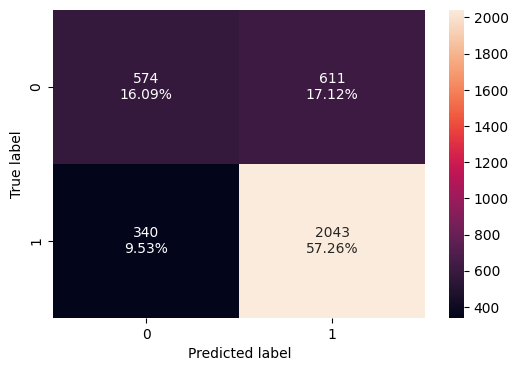

In [56]:
# Select a model to evaluate (e.g., XGBoost)
model = classifiers['XGBoost']

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation set
print("Model Performance on Validation Set:")
display(model_performance_classification_sklearn(model, X_val, y_val))

# Plot the confusion matrix for the validation set
print("Confusion Matrix on Validation Set:")
confusion_matrix_sklearn(model, X_val, y_val)

## Actionable Insights and Recommendations

<font size=6 color='blue'>Power Ahead</font>
___